** Train, Test and Evaluation part**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier

In [2]:
p_df = pd.read_csv(r"G:\GIT_Project-2025\iris_project\data_sets\preprocess_data.csv")
p_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Define features and target variable
X = p_df.drop('Species', axis=1)
y = p_df['Species']

# Correctly split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Create a numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, numerical_columns)
])

# Create a random forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SepalLengthCm',
                                                   'SepalWidthCm',
                                                   'PetalLengthCm',
                                                   'PetalWidthCm'])])),
                ('classifier', RandomForestClassifier())])

In [4]:
train_pred = rf_pipeline.predict(X_train)
test_pred = rf_pipeline.predict(X_test)

train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

print(f"Train r2 score {train_score : .2f}, Test r2 score {test_score :.2f}")

Train r2 score  1.00, Test r2 score 1.00


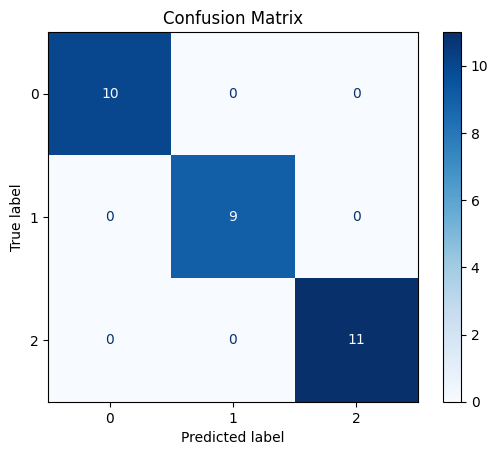

Classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Make predictions on the test set
y_pred = rf_pipeline.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)  # You can choose a different color map if you prefer
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
classification_report_model = classification_report(y_test, y_pred)
print(f"Classification_report :\n{classification_report_model}")


**Save Pickle model**

In [6]:
import pickle

# Save the trained model to a pickle file
with open('rf_pipeline_model.pkl', 'wb') as file:
    pickle.dump(rf_pipeline, file)

print("Model saved as rf_pipeline_model.pkl")

Model saved as rf_pipeline_model.pkl


**Evaluation**

In [7]:
import pandas as pd
import pickle

# Load the saved model
with open('rf_pipeline_model.pkl', 'rb') as model_file:
    rf_pipeline = pickle.load(model_file)

def predict():
    # Get user input for the features
    SepalLengthCm = float(input("Enter the value of Sepal Length in cm: "))
    SepalWidthCm = float(input("Enter the value of Sepal Width in cm: "))
    PetalLengthCm = float(input("Enter the value of Petal Length in cm: "))
    PetalWidthCm = float(input("Enter the value of Petal Width in cm: "))

    # Create a DataFrame from the user input
    user_input = {
        'SepalLengthCm': SepalLengthCm,
        'SepalWidthCm': SepalWidthCm,
        'PetalLengthCm': PetalLengthCm,
        'PetalWidthCm': PetalWidthCm
    }

    user_input_df = pd.DataFrame([user_input])

    # Make a prediction using the loaded model
    prediction = rf_pipeline.predict(user_input_df)

    # Map the predicted label to the species names
    species_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    predicted_species = species_names[prediction[0]]

    # Display the prediction result
    print(f"The predicted species is: {predicted_species}")

# Call the predict function
predict()

The predicted species is: Iris-virginica
